In [26]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter
import ast

In [ ]:
# JUST PLOTTING

In [80]:
## Base Data
df_population = pd.read_csv('Population Data.csv')
df_temperature = pd.read_csv('Temperature Data.csv')

In [52]:
# My timeseries
df = pd.read_csv('temperature_of_location_date.csv')

In [53]:
df['datetime'] = df['date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))


In [54]:
df['datetime'].iloc[-1]

Timestamp('2021-04-20 00:00:00')

In [55]:
df['daily_temps'] = df['daily_temps'].apply(ast.literal_eval)

In [9]:
df.head(3)

,Unnamed: 0,date,"Henderson, Nevada","Manchester, New Hampshire","Elizabeth, New Jersey","Newark, New Jersey","Paterson, New Jersey","Jersey City, New Jersey","Albuquerque, New Mexico","Buffalo, New York",...,"Hialeah, Florida","Coral Springs, Florida","Miami Gardens, Florida","Miami, Florida","Hollywood, Florida","Fort Lauderdale, Florida","Pompano Beach, Florida","West Palm Beach, Florida",daily_temps,datetime
0,0,1/1/2015,"(2.8042193135220215, -1.06443748149932, 7.8955...","(-2.0414172014848404, -5.2967596261279555, 0.8...","(0.7271640854069779, -2.220666115556862, 3.413...","(0.721623158787829, -2.219899178588003, 3.3984...","(0.7451333314337338, -2.249080056243332, 3.489...","(0.7012627531441941, -2.2070541621717514, 3.33...","(-3.5077581597478513, -7.620209751439084, 0.50...","(-3.254167638382994, -6.70000884781188, 1.5518...",...,"(7.267839188054266, 1.2597305417711855, 13.306...","(7.201354121181819, 1.154658288185659, 13.2794...","(7.243316298738816, 1.2219635019938928, 13.294...","(7.258345407380921, 1.246744173453674, 13.2989...","(7.2134740706337235, 1.1762319103059715, 13.28...","(7.192921258888248, 1.143997576015988, 13.2713...","(7.1745562775268095, 1.1151363386505413, 13.26...","(7.093912585440351, 0.9870844318322061, 13.232...","(2.143194204652545, -2.0310582522610594, 6.328...",2015-01-01
1,1,1/2/2015,"(3.5833611965500256, -1.6416043119829218, 9.48...","(1.8123476273733083, -0.4878899169065774, 4.51...","(3.6269191023738485, 1.5579536595154981, 5.636...","(3.632688786895376, 1.576935014315009, 5.63197...","(3.5967672015962546, 1.4627489512318697, 5.664...","(3.6583143659774557, 1.659695936931595, 5.6106...","(-1.610522538889761, -6.293151018732043, 4.471...","(-1.5874865803073686, -4.999969140526002, 4.40...",...,"(11.964299921129687, 8.54262383433644, 15.0643...","(11.84453325605251, 8.456272588337987, 14.9129...","(11.926497144776375, 8.513341986493058, 15.018...","(11.960202600064934, 8.53553492156532, 15.0627...","(11.88196168021216, 8.478299895369968, 14.9645...","(11.846530507310883, 8.452247756304931, 14.920...","(11.814495652370088, 8.428817579069989, 14.880...","(11.66533322685168, 8.322509004465156, 14.6904...","(4.36100033710542, 0.7371562847348073, 8.15968...",2015-01-02
2,2,1/3/2015,"(5.313746601456074, 0.0537208688345699, 11.180...","(-1.5042004354211354, -4.641065832081684, 3.01...","(1.9401067861655703, -0.10967571559474101, 5.0...","(1.9366071662619098, -0.09493625703022997, 5.0...","(1.9531350402008638, -0.18257317909691917, 5.0...","(1.9230983187361388, -0.031069294684709044, 5....","(-1.5629823097813509, -8.72259919416442, 5.303...","(-0.6332781996894676, -5.599949953882896, 8.30...",...,"(13.89843974963735, 11.627892569102759, 17.399...","(13.77680428203832, 11.520199220572355, 17.277...","(13.857516482265103, 11.592308604298138, 17.35...","(13.889114398533502, 11.620959646627288, 17.38...","(13.808623920967795, 11.549958815046766, 17.30...","(13.772007402977584, 11.517701465200151, 17.26...","(13.73905655470369, 11.488634166796471, 17.230...","(13.589111450096825, 11.35548016535289, 17.081...","(5.463414875888266, 1.5140982044930749, 9.7487...",2015-01-03


<IPython.core.display.Javascript object>


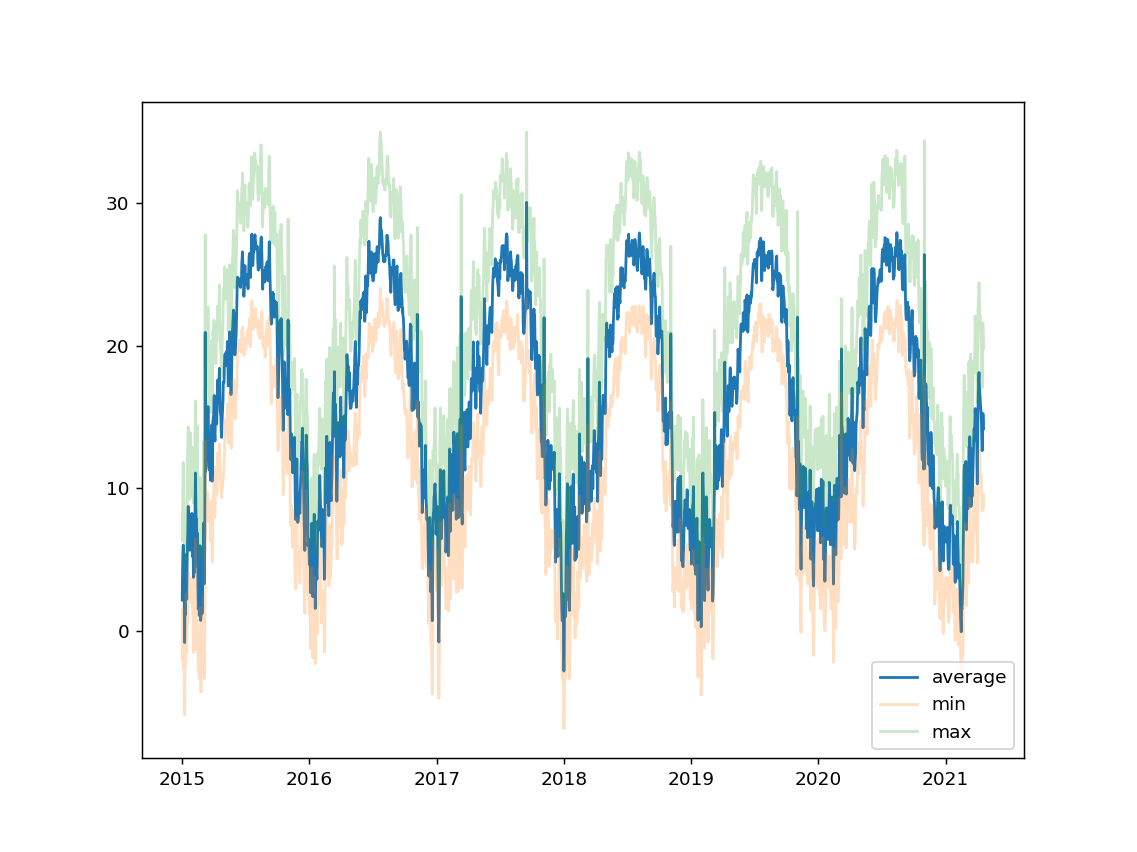

In [198]:
# 2a) Seasonal-temperature
fig, ax = plt.subplots()
ax.plot(df['datetime'].values, [t[0] for t in df['daily_temps'].values], label='average')
ax.plot(df['datetime'].values,  [t[1] for t in df['daily_temps'].values], alpha=0.25, label='min')
ax.plot(df['datetime'].values, [t[2] for t in df['daily_temps'].values], alpha=0.25, label='max')
ax.legend()

In [57]:
#Monthly averages
df['month'] = df.datetime.apply(lambda x: x.month)

In [78]:
df.head(2)

,Unnamed: 0,date,"Henderson, Nevada","Manchester, New Hampshire","Elizabeth, New Jersey","Newark, New Jersey","Paterson, New Jersey","Jersey City, New Jersey","Albuquerque, New Mexico","Buffalo, New York",...,"Hollywood, Florida","Fort Lauderdale, Florida","Pompano Beach, Florida","West Palm Beach, Florida",daily_temps,datetime,month,temp_mean,temp_min,temp_max
0,0,1/1/2015,"(2.8042193135220215, -1.06443748149932, 7.8955...","(-2.0414172014848404, -5.2967596261279555, 0.8...","(0.7271640854069779, -2.220666115556862, 3.413...","(0.721623158787829, -2.219899178588003, 3.3984...","(0.7451333314337338, -2.249080056243332, 3.489...","(0.7012627531441941, -2.2070541621717514, 3.33...","(-3.5077581597478513, -7.620209751439084, 0.50...","(-3.254167638382994, -6.70000884781188, 1.5518...",...,"(7.2134740706337235, 1.1762319103059715, 13.28...","(7.192921258888248, 1.143997576015988, 13.2713...","(7.1745562775268095, 1.1151363386505413, 13.26...","(7.093912585440351, 0.9870844318322061, 13.232...","(2.143194204652545, -2.0310582522610594, 6.328...",2015-01-01,1,2.143194,-2.031058,6.328439
1,1,1/2/2015,"(3.5833611965500256, -1.6416043119829218, 9.48...","(1.8123476273733083, -0.4878899169065774, 4.51...","(3.6269191023738485, 1.5579536595154981, 5.636...","(3.632688786895376, 1.576935014315009, 5.63197...","(3.5967672015962546, 1.4627489512318697, 5.664...","(3.6583143659774557, 1.659695936931595, 5.6106...","(-1.610522538889761, -6.293151018732043, 4.471...","(-1.5874865803073686, -4.999969140526002, 4.40...",...,"(11.88196168021216, 8.478299895369968, 14.9645...","(11.846530507310883, 8.452247756304931, 14.920...","(11.814495652370088, 8.428817579069989, 14.880...","(11.66533322685168, 8.322509004465156, 14.6904...","(4.36100033710542, 0.7371562847348073, 8.15968...",2015-01-02,1,4.361000,0.737156,8.159681


In [66]:
df['temp_mean'] = df['daily_temps'].apply(lambda x: x[0])
df['temp_min'] = df['daily_temps'].apply(lambda x: x[1])
df['temp_max'] = df['daily_temps'].apply(lambda x: x[2])


In [69]:
df_monthly = df.groupby('month').mean()

Text(0, 0.5, 'Temperature')

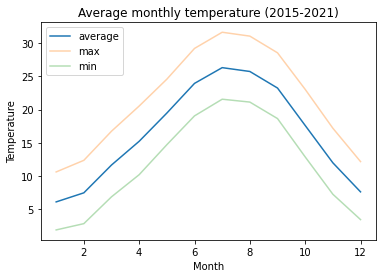

In [77]:
# 2b) Monthly
fig, ax = plt.subplots()
ax.plot(df_monthly.index.values, df_monthly.temp_mean.values, label='average')
ax.plot(df_monthly.index.values, df_monthly.temp_max.values, alpha=0.35, label='max')
ax.plot(df_monthly.index.values, df_monthly.temp_min.values, alpha=0.35, label='min')
ax.legend()
ax.set_title("Average monthly temperature (2015-2021)")
ax.set_xlabel("Month")
ax.set_ylabel("Temperature")

In [ ]:
# 2c) Missing data
fig, ax = plt.subplots()
# Number of stations... 

#num_distinct = df_population

In [210]:
def count_missing_stations(df_temperature):
    """Count stations that have no latitude/longitude. """
    lats = [df_temperature[df_temperature['name'] == uname].Lat.iloc[0] for uname in df_temperature.name.unique()]
    return np.count_nonzero(np.isnan(lats))

def get_stations(df_temperature):
    """Return stations that have a latitude/longitude. """
    lats = [(uname, df_temperature[df_temperature['name'] == uname].Lat.iloc[0]) for uname in df_temperature.name.unique()]
    return dict(lats)

def available_stations(df_temperature):
    return [k for k,v in get_stations(df_temperature).items() if not np.isnan(v)]

In [144]:
# Get number of stations, missing
stations = df_temperature.name.unique()
num_stations = len(stations)
num_located_stations = num_stations - count_missing_stations(df_temperature)
missing_stations = [k for k,v in get_stations(df_temperature).items() if np.isnan(v)]
available_stations =  [k for k,v in get_stations(df_temperature).items() if not np.isnan(v)]
num_missing = len(missing_stations)
print(num_stations, num_located_stations, num_missing)

38 33 5


In [145]:
# By date:
date = "4/19/2021"
df_date = df_temperature[df_temperature.location_date == date]

In [187]:
datetimes = [datetime.datetime.strptime(dt, "%m/%d/%Y") for dt in df_temperature.location_date.unique()]

In [197]:
#datetimes

In [183]:
type(datetimes[0])

str

In [532]:
# For each day, get the number of available stations
def get_num_stations_by_day(df_temperature):
    avail_stations = []
    dates = df_temperature.location_date.unique()
    for date_i in dates:
        df_date = df_temperature[df_temperature.location_date == date_i]
        avail_stations.append(len(available_stations(df_date)))
    return avail_stations

In [164]:
## Some dates have missing stations...

(array([ 1, 28, 30, 31, 32, 33]), array([  14,    2,    2,    2,    3, 2279]))

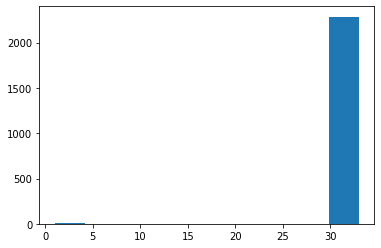

In [163]:
fig, ax = plt.subplots()

ax.hist(avail_stations)
np.unique(avail_stations, return_counts=True)

In [176]:
%matplotlib notebook

There are rare days < 1% where the station coverage drops to 1. For these, let's use temporal interpolation
to find the temperature on that day.

In [194]:
datetimes[0].date()

datetime.date(2021, 4, 20)

In [ ]:
# 15 days is shortest time between two big station dips.
# So, on days where the num_avail < (1/2)(num_stations), interpolate using

<IPython.core.display.Javascript object>


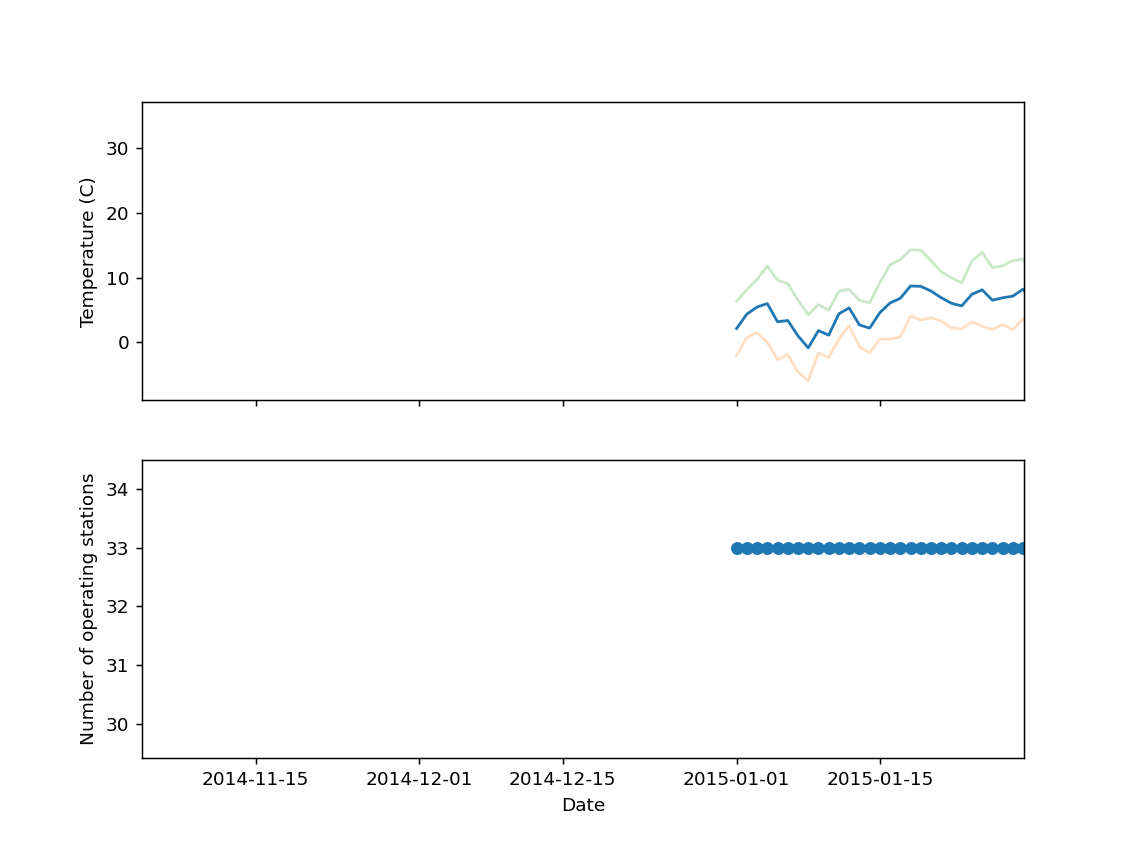

Text(0, 0.5, 'Number of operating stations')

In [202]:
# 2a) Seasonal-temperature
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(df['datetime'].values, [t[0] for t in df['daily_temps'].values], label='average')
ax[0].plot(df['datetime'].values,  [t[1] for t in df['daily_temps'].values], alpha=0.25, label='min')
ax[0].plot(df['datetime'].values, [t[2] for t in df['daily_temps'].values], alpha=0.25, label='max')
ax[0].set_ylabel("Temperature (C)")

#ax.legend()
ax[1].scatter([dt.date() for dt in datetimes], avail_stations) 
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of operating stations")


You can see that while the large majority of days all stations are up, there are 14 days where only 1/30 is up. For those days, we're getting massive jumps in the US average (+10 degrees).

We're better off just interpolating the value from the surrounding points. (Linear interpolation)

In [ ]:
# Really, I should've started by doing linear interpolation on the signals...

In [219]:
len(available_stations(df_temperature[df_temperature.location_date == '9/14/2017']))

df['operating_stations'] = df['date'].apply(lambda x: available_stations(df_temperature[df_temperature.location_date==x]))

In [ ]:
df_temperature['datetime'] = df['date'].apply(lambda x: )

In [252]:
df_temperature['datetime'] = df_temperature['location_date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))


In [253]:
# All dates:
dates_ = df_temperature.datetime.unique()

In [273]:
print(len(dates_))
dates_

2302


array(['2021-04-20T00:00:00.000000000', '2021-04-19T00:00:00.000000000',
       '2021-04-18T00:00:00.000000000', ...,
       '2015-01-03T00:00:00.000000000', '2015-01-02T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [491]:
# Station data
station_name = 'Atlanta'
df_station = df_temperature[df_temperature['name'] == station_name]

station_dates = df_station.datetime.unique()



In [262]:
print(dates_[0], station_dates[0])

2021-04-20T00:00:00.000000000 2021-04-20T00:00:00.000000000


In [257]:
station_dates

array(['2021-04-20T00:00:00.000000000', '2021-04-19T00:00:00.000000000',
       '2021-04-18T00:00:00.000000000', ...,
       '2015-01-03T00:00:00.000000000', '2015-01-02T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [280]:
def missing_datetimes_of_station(station_name, df_temperature):
    ref_dates = df_temperature.datetime.unique()
    df_station = df_temperature[df_temperature['name'] == station_name]

    station_dates = df_station.datetime.unique()
    missing_dts = []
    for d in ref_dates:
        if d not in station_dates:
            missing_dts.append(d)
            
    return missing_dts

In [404]:
missing_dts = missing_datetimes_of_station('Atlanta', df_temperature)

In [295]:
station_name = 'Raleigh/Durham'
missing_dts = missing_datetimes_of_station(station_name, df_temperature)
missing_dts

[numpy.datetime64('2021-03-14T00:00:00.000000000'),
 numpy.datetime64('2020-11-01T00:00:00.000000000'),
 numpy.datetime64('2020-03-08T00:00:00.000000000'),
 numpy.datetime64('2019-11-03T00:00:00.000000000'),
 numpy.datetime64('2019-03-10T00:00:00.000000000'),
 numpy.datetime64('2018-11-04T00:00:00.000000000'),
 numpy.datetime64('2018-03-11T00:00:00.000000000'),
 numpy.datetime64('2017-11-05T00:00:00.000000000'),
 numpy.datetime64('2017-09-16T00:00:00.000000000'),
 numpy.datetime64('2017-03-12T00:00:00.000000000'),
 numpy.datetime64('2016-11-06T00:00:00.000000000'),
 numpy.datetime64('2016-03-13T00:00:00.000000000'),
 numpy.datetime64('2015-11-01T00:00:00.000000000'),
 numpy.datetime64('2015-03-08T00:00:00.000000000')]

In [435]:
# make new rows with same details, but datetime, nan floats 
print(missing_dts[0])
matching_row = df_temperature[df_temperature.name==station_name].iloc[0]

2021-03-14T00:00:00.000000000


In [500]:
def interpolate_temperature(dt, df_station, field='temp_mean_c'):
    # From the new datetime, get the temperature from previous and following day.
    #print(df_station)
    #print(dt)
    dt = pd.to_datetime(dt).to_pydatetime()
    next_day = dt + datetime.timedelta(days=1)
    prev_day = dt - datetime.timedelta(days=1)
    #return next_day, prev_day, dt
    #print(next_day, prev_day, dt)
    prev_temps = df_station[df_station.datetime == prev_day][field].values
    next_temps = df_station[df_station.datetime == next_day][field].values
    
    # Handle the case where one is missing
    prev_temp = prev_temps[0] if prev_temps.size > 0 else float("nan")
    next_temp = next_temps[0] if next_temps.size > 0 else float("nan")


    return np.nanmean([prev_temp, next_temp])

In [486]:
np.nanmean([18, float("nan")])

18.0

In [492]:
interpolate_temperature(missing_dts[0], df_station, field='temp_mean_c')

18.8229167

In [490]:
df_station[df_station.datetime == pd.to_datetime(missing_dts[11]).to_pydatetime() - datetime.timedelta(days=1)]['temp_mean_c'].values[0]

19.8791667

In [395]:
df_station[df_station.datetime == interpolate_temperature(missing_dts[0], df_station) + datetime.timedelta(days=1)]

2021-03-14T00:00:00.000000000


,Unnamed: 0,name,country_name,country_code,continent,station_code,location_date,temp_mean_c,temp_min_c,temp_max_c,City,State,datetime,LonLat,Lat,Lon
1403,1403,Atlanta,UnitedStates,USA,North America,KATL,3/15/2021,18.266667,15.6,20.6,Atlanta,Georgia,2021-03-15,"(-84.4227, 33.7629)",33.7629,-84.4227


In [449]:
def create_new_date_row(row, dt, df_station):
    """Use an old row and new datetime to create a new row, to be interpolated on."""
    new_row = row.copy()
    # Change fields... (temp_mean_c, temp_min_c, temp_max_c, datetime, date)
    #print(new_row)
    
    #print(dt)
    # Replace dates...
    new_row['datetime'] = dt
    new_row['location_date'] = pd.to_datetime(dt).to_pydatetime().strftime("%-m/%-d/%Y")
    # Make temps nan
    new_row['temp_mean_c'] = interpolate_temperature(dt, df_station, field='temp_mean_c')
    new_row['temp_min_c'] = interpolate_temperature(dt, df_station, field='temp_min_c')
    new_row['temp_max_c'] = interpolate_temperature(dt, df_station, field='temp_max_c')

    #print(new_row)
    return new_row

In [495]:
matching_row

Unnamed: 0                        31
name                  Raleigh/Durham
country_name            UnitedStates
country_code                     USA
continent              North America
station_code                    KRDU
location_date              4/20/2021
temp_mean_c                  15.7792
temp_min_c                       6.7
temp_max_c                      23.9
City                         Raleigh
State                 North Carolina
datetime         2021-04-20 00:00:00
LonLat           (-78.6414, 35.8302)
Lat                          35.8302
Lon                         -78.6414
Name: 31, dtype: object

In [496]:
# Create all missing rows
def build_interpolated_df(station_name, df_temperature):
# Station data
    df_station = df_temperature[df_temperature['name'] == station_name]

    station_dates = df_station.datetime.unique()
    missing_dts = missing_datetimes_of_station(station_name, df_temperature)

    # This row is just for a template
    matching_row = df_temperature[df_temperature.name==station_name].iloc[0]

    rows = []

    for missing_dt in missing_dts:
        rows.append(create_new_date_row(matching_row, missing_dt, df_station))
    return pd.DataFrame(rows)

In [499]:
np.nanmean([float("nan")])

<ipython-input-499-377c49eef266>:1: RuntimeWarning: Mean of empty slice
  np.nanmean([float("nan")])


nan

In [510]:
dfs_interp = []
for station_u in df_temperature.name.unique():
    dfs_interp.append(build_interpolated_df(station_u, df_temperature))

In [514]:
# Contains the interpolations for all missing day-stations
df_interp_full = pd.concat(dfs_interp, ignore_index=True)

In [515]:
len(df_interp_full)

544

In [520]:
# Now add these interpolations to the original set
df_full = pd.concat([df_interp_full, df_temperature], ignore_index=True)

In [524]:
df_full.sort_values(by=['datetime'])

,Unnamed: 0,name,country_name,country_code,continent,station_code,location_date,temp_mean_c,temp_min_c,temp_max_c,City,State,datetime,LonLat,Lat,Lon
89762,89218,Phoenix/Sky HRBR,UnitedStates,USA,North America,KPHX,1/1/2015,4.354167,1.7,7.2,Phoenix,Arizona,2015-01-01,"(-112.088, 33.5722)",33.5722,-112.0880
89728,89184,Boise,UnitedStates,USA,North America,KBOI,1/1/2015,-11.070833,-13.9,-8.0,Boise,Idaho,2015-01-01,"(-116.2311, 43.5985)",43.5985,-116.2311
89729,89185,Boston,UnitedStates,USA,North America,KBOS,1/1/2015,-2.329167,-5.6,0.6,Boston,Massachusetts,2015-01-01,"(-71.0202, 42.332)",42.3320,-71.0202
89746,89202,Little Rock,UnitedStates,USA,North America,KLIT,1/1/2015,2.362500,1.7,3.9,Little Rock,Arkansas,2015-01-01,"(-92.3586, 34.7254)",34.7254,-92.3586
89745,89201,NYC/LaGuardia,UnitedStates,USA,North America,KLGA,1/1/2015,0.691667,-2.2,3.3,New York,New York,2015-01-01,"(-73.9385, 40.6643)",40.6643,-73.9385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,22,Memphis,UnitedStates,USA,North America,KMEM,4/20/2021,14.225000,4.4,23.3,Memphis,Tennessee,2021-04-20,"(-89.9785, 35.1035)",35.1035,-89.9785
565,21,Little Rock,UnitedStates,USA,North America,KLIT,4/20/2021,13.225000,5.6,23.3,Little Rock,Arkansas,2021-04-20,"(-92.3586, 34.7254)",34.7254,-92.3586
564,20,NYC/LaGuardia,UnitedStates,USA,North America,KLGA,4/20/2021,16.891667,11.7,23.3,New York,New York,2021-04-20,"(-73.9385, 40.6643)",40.6643,-73.9385
562,18,Houston,UnitedStates,USA,North America,KIAH,4/20/2021,19.787500,11.7,27.2,Houston,Texas,2021-04-20,"(-95.3863, 29.7805)",29.7805,-95.3863


In [534]:
avails_std = get_num_stations_by_day(df_temperature)

In [535]:
avails_interp = get_num_stations_by_day(df_full)

<IPython.core.display.Javascript object>


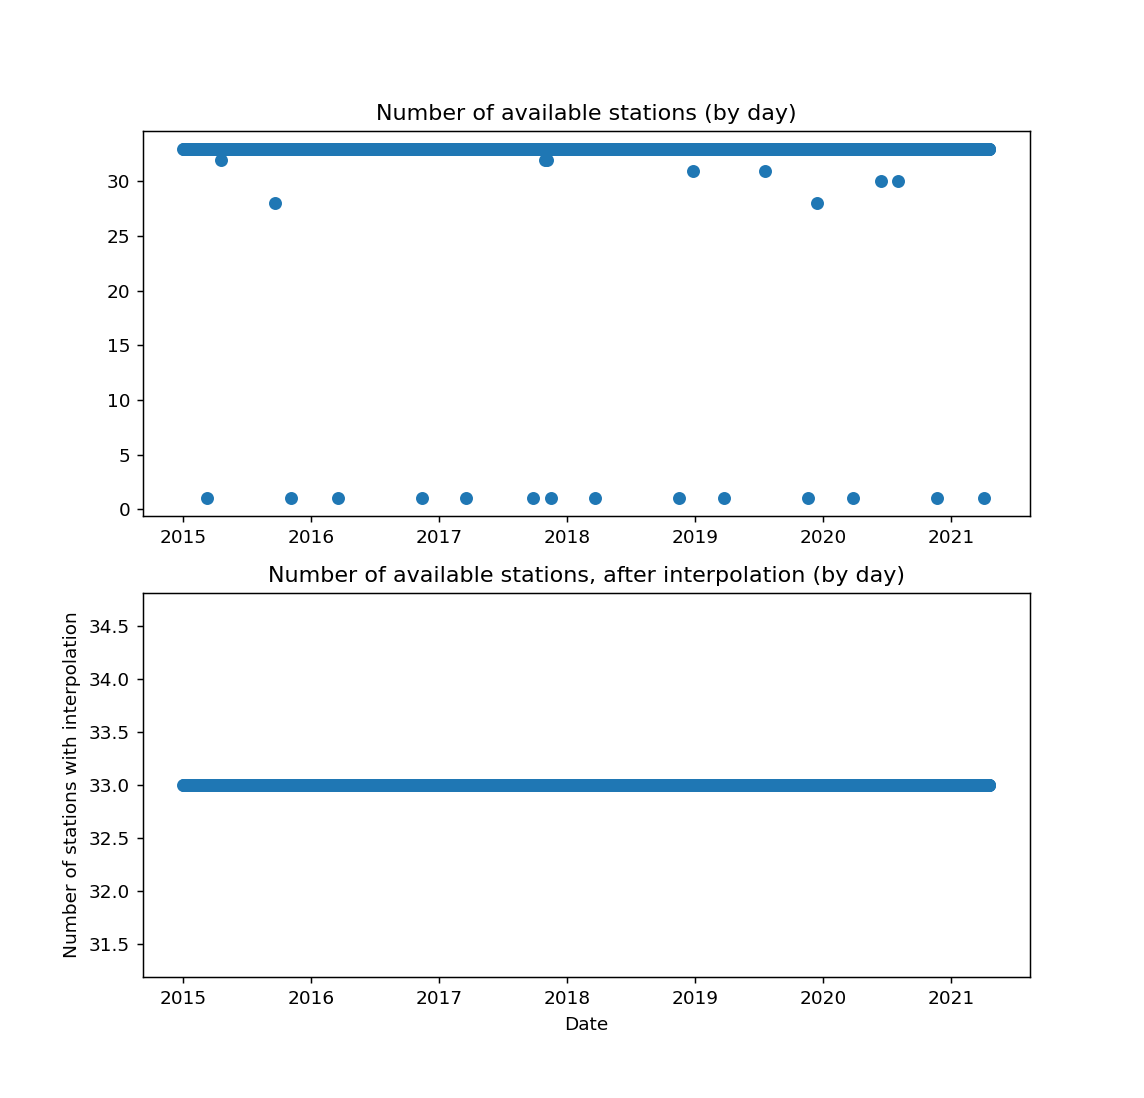

Text(0, 0.5, 'Number of stations with interpolation')

In [544]:
# This should no drastic dip...
# 2a) Seasonal-temperature
fig, ax = plt.subplots(2,1)
#ax.legend()

ax[0].scatter([dt for dt in df_full.datetime.unique()], avails_std) 
ax[0].set_title("Number of available stations (by day)")
ax[1].set_ylabel("Number of operating stations")
ax[1].scatter([dt for dt in df_full.datetime.unique()], avails_interp) 
ax[1].set_title("Number of available stations, after interpolation (by day)")

ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of stations with interpolation")

In [551]:
df_full.sort_values(by=['datetime'])

,Unnamed: 0,name,country_name,country_code,continent,station_code,location_date,temp_mean_c,temp_min_c,temp_max_c,City,State,datetime,LonLat,Lat,Lon
89762,89218,Phoenix/Sky HRBR,UnitedStates,USA,North America,KPHX,1/1/2015,4.354167,1.7,7.2,Phoenix,Arizona,2015-01-01,"(-112.088, 33.5722)",33.5722,-112.0880
89728,89184,Boise,UnitedStates,USA,North America,KBOI,1/1/2015,-11.070833,-13.9,-8.0,Boise,Idaho,2015-01-01,"(-116.2311, 43.5985)",43.5985,-116.2311
89729,89185,Boston,UnitedStates,USA,North America,KBOS,1/1/2015,-2.329167,-5.6,0.6,Boston,Massachusetts,2015-01-01,"(-71.0202, 42.332)",42.3320,-71.0202
89746,89202,Little Rock,UnitedStates,USA,North America,KLIT,1/1/2015,2.362500,1.7,3.9,Little Rock,Arkansas,2015-01-01,"(-92.3586, 34.7254)",34.7254,-92.3586
89745,89201,NYC/LaGuardia,UnitedStates,USA,North America,KLGA,1/1/2015,0.691667,-2.2,3.3,New York,New York,2015-01-01,"(-73.9385, 40.6643)",40.6643,-73.9385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,22,Memphis,UnitedStates,USA,North America,KMEM,4/20/2021,14.225000,4.4,23.3,Memphis,Tennessee,2021-04-20,"(-89.9785, 35.1035)",35.1035,-89.9785
565,21,Little Rock,UnitedStates,USA,North America,KLIT,4/20/2021,13.225000,5.6,23.3,Little Rock,Arkansas,2021-04-20,"(-92.3586, 34.7254)",34.7254,-92.3586
564,20,NYC/LaGuardia,UnitedStates,USA,North America,KLGA,4/20/2021,16.891667,11.7,23.3,New York,New York,2021-04-20,"(-73.9385, 40.6643)",40.6643,-73.9385
562,18,Houston,UnitedStates,USA,North America,KIAH,4/20/2021,19.787500,11.7,27.2,Houston,Texas,2021-04-20,"(-95.3863, 29.7805)",29.7805,-95.3863


In [546]:
#build_interpolated_df('Raleigh/Durham') #'Atlanta'

In [547]:
df_temperature

,Unnamed: 0,name,country_name,country_code,continent,station_code,location_date,temp_mean_c,temp_min_c,temp_max_c,City,State,datetime,LonLat,Lat,Lon
0,0,Atlanta,UnitedStates,USA,North America,KATL,4/20/2021,17.491667,12.2,23.3,Atlanta,Georgia,2021-04-20,"(-84.4227, 33.7629)",33.7629,-84.4227
1,1,Windsor Locks,UnitedStates,USA,North America,KBDL,4/20/2021,13.887500,3.9,22.2,NaN,NaN,2021-04-20,"(nan, nan)",NaN,NaN
2,2,Nashville,UnitedStates,USA,North America,KBNA,4/20/2021,15.175000,6.7,23.3,Nashville,Tennessee,2021-04-20,"(-86.785, 36.1718)",36.1718,-86.7850
3,3,Boise,UnitedStates,USA,North America,KBOI,4/20/2021,9.329167,1.7,15.6,Boise,Idaho,2021-04-20,"(-116.2311, 43.5985)",43.5985,-116.2311
4,4,Boston,UnitedStates,USA,North America,KBOS,4/20/2021,16.716667,10.0,23.9,Boston,Massachusetts,2021-04-20,"(-71.0202, 42.332)",42.3320,-71.0202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89214,89214,Sacramento/Execu,UnitedStates,USA,North America,KSAC,1/1/2015,3.500000,-1.7,10.6,Sacramento,California,2015-01-01,"(-121.4686, 38.5666)",38.5666,-121.4686
89215,89215,Portland,UnitedStates,USA,North America,KPWM,1/1/2015,-3.454167,-7.8,-0.6,Portland,Oregon,2015-01-01,"(-122.65, 45.537)",45.5370,-122.6500
89216,89216,Raleigh/Durham,UnitedStates,USA,North America,KRDU,1/1/2015,3.291667,-4.4,10.6,Raleigh,North Carolina,2015-01-01,"(-78.6414, 35.8302)",35.8302,-78.6414
89217,89217,Pittsburgh,UnitedStates,USA,North America,KPIT,1/1/2015,-2.570833,-6.7,1.7,Pittsburgh,Pennsylvania,2015-01-01,"(-79.9766, 40.4398)",40.4398,-79.9766


In [106]:
def count_days_operational(df_temperature):
    """Count the frequency of (number of days operational)."""
    nums, freqs = np.unique(df_temperature['name'].value_counts(), return_counts=True)
    num_freqs = [(n, f) for n,f in zip(nums,freqs)]
    num_freqs = sorted(num_freqs, key=lambda x: x[0])
    return nums, freqs

In [108]:
count_days_operational(df_temperature_new)

(array([2302, 4589]), array([37,  1]))

In [587]:
count_days_operational(df_full)

(array([2302, 4589]), array([37,  1]))

In [246]:
c

0

In [588]:
# Export dataframe and good to go
df_full.to_csv('data/interpolated_temperatures.csv')

In [104]:
df_full

NameError: name 'df_full' is not defined

In [110]:
### Removing dependency on date for closest_stations

In [209]:
import math
import numpy as np
def haversine(origin, destination):
    # Lat/Long
    # Returns distance in km
    lat1, lon1 = origin
    lat2, lon2 = destination
    if np.isnan(lat2) or np.isnan(lon2):
        return float("nan")
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

def closest_stations_2(latlong, df):
    """Stations and their distances, ranked descending."""
    names = df['name'].values
    station_dists = {}
    for (lat, lon, name) in list(df[['Lat', 'Lon', 'name']].value_counts().index):
        if not(np.isnan(lat) or np.isnan(lon)):
            station_dists[name] = haversine(latlong, (lat, lon))     
            
    return sorted(station_dists.items(), key=lambda x: x[1])


def idw_temperature_avg_min_max(origin, df_subset):
    # Interpolate avg temperature using inverse-distance-weighting,
    # using the stations data from df_subset

    latlongs = df_subset[['Lat','Lon']].values
    mean_temps = df_subset['temp_mean_c'].values
    min_temps = df_subset['temp_min_c'].values
    max_temps = df_subset['temp_max_c'].values


    # Compute distances
    dists = [haversine(origin, latlong) for latlong in latlongs]
    # Compute inverse-distance-weighted temperature, from stations in df_subset
    idw_means = [(t)*((1/(d+1))**2) for t,d in zip(mean_temps, dists)]
    idw_maxs = [(t)*((1/(d+1))**2) for t,d in zip(max_temps, dists)]
    idw_mins = [(t)*((1/(d+1))**2) for t,d in zip(min_temps, dists)]

    sqdist_sum = sum([((1/(d+1))**2) for d in dists])
    interpolated_mean = sum(idw_means)/sqdist_sum
    interpolated_min = sum(idw_mins)/sqdist_sum
    interpolated_max = sum(idw_maxs)/sqdist_sum
    #print(df_subset)
    #print(dists, latlongs, origin, sqdist_sum)
    #[] (36.0122, -115.0375) 0
    #return (float("nan"), float("nan"), float("nan"))
    return (interpolated_mean, interpolated_min, interpolated_max)

In [183]:
df_temperature_new.location_date.unique()

array(['3/14/2021', '11/1/2020', '3/8/2020', ..., '1/3/2015', '1/2/2015',
       '1/1/2015'], dtype=object)

In [220]:
def make_list_of_dicts_of_temps_2(df_population, df_temperature):
    # For each unique date, each city. 
    # Compute temperature (using 3 neighbors, idw)
    # And save a tuple (t_mean, t_min, t_max)
    list_of_dicttemps = []
    for date in df_temperature.location_date.unique():
        dicttemp = {}
        dicttemp['date'] = date
        # And each unique city
        for i in range(len(df_population)):
            series = df_population.iloc[i]
            loc = (series.Lat, series.Lon)
            
            
            close_stations = location_to_stations[series.City]
            # Use only 3 closest stations, on the date
            m1 = df_temperature.location_date == date 
            m2 = df_temperature.name.isin([cs[0] for cs in close_stations[:3]])
            dft = df_temperature[m1 & m2]

            # mask is empty?
            if dft.empty:
                print("PROBLEM")
                print(date, series)
                print("stations:")
                print(close_stations, date)
                print(dft)
                print()
                continue
            mean_temp, min_temp, max_temp = idw_temperature_avg_min_max(loc, dft)

            dicttemp[f"{series.City}, {series.State}"] = (mean_temp, min_temp, max_temp)
        # Append the dictionary of many city: (mean, min, max)
        list_of_dicttemps.append(dicttemp)
    return list_of_dicttemps

In [203]:
#df_temperature_new[df_temperature_new.location_date == '3/14/2021'].name

In [7]:
import pandas as pd
df_temperature_new = pd.read_csv('data/interpolated_temperatures.csv')

In [9]:
df_population = pd.read_csv('Population Data.csv')

In [ ]:
#close_stations = closest_stations(loc, date, df_temperature)

In [36]:
ser = df_population.iloc[100]
loc = ser.Lat, ser.Lon
loc_dists = closest_stations_2(loc, df_temperature_new)

In [210]:
# Location to closest stations:
location_to_stations = {}
for (lat, lon, city) in df_population[['Lat', 'Lon','City']].values:
    location_to_stations[city] = closest_stations_2((lat,lon), df_temperature_new)

In [222]:
#location_to_stations

In [125]:
#sorted(df_temperature_new['datetime'])[-100:]

In [60]:
ser = df_population.iloc[105]
loc = ser.Lat, ser.Lon
close_stations = closest_stations_2(loc, df_temperature_new)

In [66]:
ser.City

'Pomona'

In [63]:
date = df_temperature_new.location_date.iloc[0]

In [91]:
mask = (df_temperature_new.name.isin([s[0] for s in close_stations[:3]])) & (df_temperature_new.location_date == date) 

idw_temperature_avg_min_max(loc, df_temperature_new[mask])

(11.104167879698535, 7.188723941287924, 15.262348884271702)

In [161]:
mask = (df_temperature_new.name.isin([s[0] for s in close_stations[:3]])) & (df_temperature_new.location_date == date) 
df_temperature_new[mask]

,Unnamed: 0,Unnamed: 0.1,name,country_name,country_code,continent,station_code,location_date,temp_mean_c,temp_min_c,temp_max_c,City,State,datetime,LonLat,Lat,Lon
87,87,6,Burbank,UnitedStates,USA,North America,KBUR,3/14/2021,10.414583,6.10,15.00,Burbank,California,2021-03-14,"(-118.3249, 34.189)",34.1890,-118.3249
133,133,9,Los Angeles,UnitedStates,USA,North America,KCQT,3/14/2021,11.945833,8.60,15.55,Los Angeles,California,2021-03-14,"(-118.4108, 34.0194)",34.0194,-118.4108
286,286,19,Las Vegas,UnitedStates,USA,North America,KLAS,3/14/2021,11.425000,5.25,16.35,Las Vegas,Nevada,2021-03-14,"(-115.264, 36.2277)",36.2277,-115.2640


In [230]:
missing_dts = missing_datetimes_of_station('Atlanta', df_temperature_new)

NameError: name 'missing_datetimes_of_station' is not defined

In [ ]:
dt = pd
pd.to_datetime(dt).to_pydatetime().strftime("%-m/%-d/%Y")

In [162]:
#df_temperature_new[df_temperature_new.location_date == "3/14/2021"]

In [186]:
#df_t_new = pd.read_csv('data/interpolated_temperatures.csv')

In [213]:
# Problem
#df_t_new[df_t_new.location_date == '3/14/2021']

In [224]:
m1 = df_temperature_new.location_date == '3/14/2021'
m2 = df_temperature_new.name.isin([cs[0] for cs in [('Las Vegas', 31.434094992671856), ('Burbank', 361.26630948780786), ('Los Angeles', 378.7358666257414)][:3]])
dft = df_temperature_new[m1 & m2]

In [231]:
dft

,Unnamed: 0,Unnamed: 0.1,name,country_name,country_code,continent,station_code,location_date,temp_mean_c,temp_min_c,temp_max_c,City,State,datetime,LonLat,Lat,Lon
87,87,6,Burbank,UnitedStates,USA,North America,KBUR,3/14/2021,10.414583,6.10,15.00,Burbank,California,2021-03-14,"(-118.3249, 34.189)",34.1890,-118.3249
133,133,9,Los Angeles,UnitedStates,USA,North America,KCQT,3/14/2021,11.945833,8.60,15.55,Los Angeles,California,2021-03-14,"(-118.4108, 34.0194)",34.0194,-118.4108
286,286,19,Las Vegas,UnitedStates,USA,North America,KLAS,3/14/2021,11.425000,5.25,16.35,Las Vegas,Nevada,2021-03-14,"(-115.264, 36.2277)",36.2277,-115.2640


In [232]:
dict_end = make_list_of_dicts_of_temps_2(df_population, df_temperature_new[:5])

PROBLEM
3/14/2021 City          Henderson
State            Nevada
population       260068
Lon            -115.037
Lat             36.0122
Name: 0, dtype: object
stations:
[('Las Vegas', 31.434094992671856), ('Burbank', 361.26630948780786), ('Los Angeles', 378.7358666257414), ('Phoenix/Sky HRBR', 382.25998641555947), ('Fresno', 434.2500740373755), ('Salt Lake City', 595.0064792732425), ('Sacramento/Execu', 635.6758012314822), ('San Francisco', 736.0319382413664), ('Boise', 849.6700003648167), ('Denver', 983.2335450322022), ('Portland', 1236.647941152177), ('Spokane', 1311.4041921351438), ('Seattle', 1424.4105268247558), ('Dallas', 1711.3750755913406), ('Houston', 1956.8151205462725), ('Little Rock', 2056.699321173047), ('Minneapolis', 2083.414210016398), ('St Louis/Lambert', 2204.797204448831), ('Memphis', 2262.857684147432), ('New Orleans', 2423.3458715430606), ("Chicago O'Hare", 2441.9043159753164), ('Nashville', 2529.588075143665), ('Atlanta', 2792.107207086349), ('Detroit/Wayne', 28

PROBLEM
3/14/2021 City            Provo
State            Utah
population     115321
Lon          -111.645
Lat           40.2453
Name: 82, dtype: object
stations:
[('Salt Lake City', 64.04854451341653), ('Boise', 531.8178668514815), ('Las Vegas', 547.140153812033), ('Denver', 578.506243080711), ('Phoenix/Sky HRBR', 743.0572646668023), ('Fresno', 806.377396451289), ('Sacramento/Execu', 863.9265453080818), ('Burbank', 895.7518380437286), ('Los Angeles', 915.3739952170386), ('Spokane', 945.762316187026), ('San Francisco', 1022.43892222904), ('Portland', 1070.9083152413068), ('Seattle', 1184.3373684823146), ('Dallas', 1563.4175424344558), ('Minneapolis', 1588.6627050490006), ('Little Rock', 1804.4770098135523), ('St Louis/Lambert', 1841.9124898720506), ('Houston', 1877.8933088056394), ('Memphis', 1984.915235215686), ("Chicago O'Hare", 2010.9320538673553), ('Nashville', 2211.0662997846007), ('New Orleans', 2265.66761586889), ('Detroit/Wayne', 2384.3757722080504), ('Atlanta', 2511.12713150885

[('New Orleans', 121.57098646013746), ('Houston', 416.44163549761214), ('Little Rock', 489.37800744677367), ('Memphis', 528.5978506087896), ('Dallas', 594.1635562111617), ('Atlanta', 730.811691666778), ('Nashville', 753.2550036422249), ('St Louis/Lambert', 913.9319900281704), ("Chicago O'Hare", 1303.3064346035044), ('Raleigh/Durham', 1305.923028401171), ('Pittsburgh', 1498.9205101995688), ('Detroit/Wayne', 1507.1000173302748), ('Wash DC/Dulles', 1593.2514376452232), ('Washington', 1593.2514376452232), ('Denver', 1620.798556183149), ('Minneapolis', 1624.7750889730141), ('Baltimore', 1646.3714359240364), ('Buffalo', 1759.9063245820146), ('Philadelphia', 1795.40284307068), ('NYC/LaGuardia', 1919.7308207654646), ('Phoenix/Sky HRBR', 2003.1583811213893), ('Salt Lake City', 2195.2161464087703), ('Boston', 2223.178712753051), ('Las Vegas', 2325.6370712045573), ('Burbank', 2581.627242803036), ('Los Angeles', 2589.04880630304), ('Boise', 2648.972834557979), ('Fresno', 2735.1531001932744), ('Sac

PROBLEM
3/14/2021 City           Fullerton
State         California
population        137183
Lon             -117.928
Lat              33.8857
Name: 260, dtype: object
stations:
[('Los Angeles', 46.94766282576722), ('Burbank', 49.74845837385404), ('Las Vegas', 355.79818512808004), ('Fresno', 363.89541586573984), ('Phoenix/Sky HRBR', 541.1212016158336), ('Sacramento/Execu', 609.6055524597543), ('San Francisco', 627.7563834757543), ('Salt Lake City', 931.4026684769714), ('Boise', 1089.9250096288772), ('Denver', 1330.5524797799674), ('Portland', 1356.418230105966), ('Spokane', 1533.7396330194856), ('Seattle', 1571.3299365218058), ('Dallas', 1966.164240009267), ('Houston', 2173.146642549562), ('Little Rock', 2344.1360235803886), ('Minneapolis', 2435.792334919769), ('St Louis/Lambert', 2527.468261787686), ('Memphis', 2556.621079646524), ('New Orleans', 2665.4432571820703), ("Chicago O'Hare", 2781.6754703976203), ('Nashville', 2834.91380469191), ('Atlanta', 3081.1067953975294), ('Detroit/Way

PROBLEM
11/1/2020 City           Irving
State           Texas
population     220702
Lon            -96.97
Lat           32.8577
Name: 67, dtype: object
stations:
[('Dallas', 20.37119325589751), ('Houston', 373.7642557620003), ('Little Rock', 473.9818396132847), ('Memphis', 691.1269900422267), ('New Orleans', 735.2245719748447), ('St Louis/Lambert', 883.3037894049963), ('Nashville', 1002.6415084214804), ('Denver', 1043.9909911332927), ('Atlanta', 1169.5838224219071), ("Chicago O'Hare", 1291.0517310795008), ('Minneapolis', 1383.2472486909696), ('Phoenix/Sky HRBR', 1407.391685351848), ('Salt Lake City', 1593.1784270029582), ('Detroit/Wayne', 1612.8695101106996), ('Raleigh/Durham', 1712.1986902050999), ('Las Vegas', 1714.1490503103137), ('Pittsburgh', 1730.3687158003202), ('Wash DC/Dulles', 1914.2959405506008), ('Washington', 1914.2959405506008), ('Buffalo', 1935.3565027189454), ('Baltimore', 1959.4502929288371), ('Burbank', 1981.4817198427963), ('Los Angeles', 1990.0445088309461), ('Boise

[("Chicago O'Hare", 263.09551270125985), ('St Louis/Lambert', 375.2073622440002), ('Detroit/Wayne', 386.04361669486843), ('Nashville', 404.73845984346104), ('Pittsburgh', 529.7108750559552), ('Memphis', 619.9400642695238), ('Atlanta', 686.0507234743911), ('Buffalo', 699.7108768761519), ('Little Rock', 785.6299545182592), ('Wash DC/Dulles', 790.6723369882283), ('Washington', 790.6723369882283), ('Raleigh/Durham', 791.5581256099671), ('Baltimore', 819.0170631280748), ('Minneapolis', 820.9473327816506), ('Philadelphia', 939.2821173999916), ('NYC/LaGuardia', 1040.3042791074195), ('New Orleans', 1133.2145645577386), ('Dallas', 1226.7862561635318), ('Boston', 1297.8452124978392), ('Houston', 1393.8402466862387), ('Denver', 1598.2713718147363), ('Salt Lake City', 2182.418018850614), ('Phoenix/Sky HRBR', 2404.528310386981), ('Boise', 2519.873965419591), ('Las Vegas', 2570.085436004426), ('Spokane', 2640.482698486456), ('Burbank', 2908.478176552277), ('Los Angeles', 2922.864886479597), ('Fresno

Index: []

PROBLEM
11/1/2020 City           Sunnyvale
State         California
population        142287
Lon             -122.026
Lat              37.3858
Name: 225, dtype: object
stations:
[('San Francisco', 96.45396237896662), ('Sacramento/Execu', 140.1025676274552), ('Fresno', 209.01665085841893), ('Burbank', 487.58391069060355), ('Los Angeles', 496.599602364702), ('Las Vegas', 615.5122207620091), ('Boise', 846.4961391014072), ('Portland', 907.8525579707765), ('Salt Lake City', 948.7351212756479), ('Phoenix/Sky HRBR', 994.087296507384), ('Seattle', 1138.3548525508502), ('Spokane', 1204.124458310051), ('Denver', 1511.3118500542207), ('Dallas', 2346.8102530357223), ('Minneapolis', 2534.2247455807724), ('Houston', 2598.1329173275576), ('Little Rock', 2672.289040102343), ('St Louis/Lambert', 2773.9408818721276), ('Memphis', 2871.3930032895305), ("Chicago O'Hare", 2963.14612186569), ('New Orleans', 3060.595229893162), ('Nashville', 3123.27449228958), ('Detroit/Wayne', 3337.539324735621), 

3/8/2020 City                  Durham
State         North Carolina
population            233252
Lon                 -78.9056
Lat                   35.981
Name: 17, dtype: object
stations:
[('Raleigh/Durham', 29.110064643848144), ('Wash DC/Dulles', 365.2764750165429), ('Washington', 365.2764750165429), ('Baltimore', 420.7411232976479), ('Pittsburgh', 504.5364179087774), ('Philadelphia', 556.5755699912687), ('Atlanta', 560.3699374396077), ('NYC/LaGuardia', 677.201146148112), ('Nashville', 708.2556147051571), ('Buffalo', 768.5338073033349), ('Detroit/Wayne', 798.2256288581848), ('Boston', 979.4284402880825), ("Chicago O'Hare", 999.398144178352), ('Memphis', 1006.0424949894295), ('St Louis/Lambert', 1044.5806225626118), ('New Orleans', 1219.5118716447666), ('Little Rock', 1227.0274826069378), ('Minneapolis', 1568.6593962926281), ('Dallas', 1674.1531543908152), ('Houston', 1683.394120597305), ('Denver', 2309.950298919181), ('Salt Lake City', 2909.981557719848), ('Phoenix/Sky HRBR', 3027.908

PROBLEM
3/8/2020 City            Bellevue
State         Washington
population        124798
Lon             -122.156
Lat              47.5978
Name: 95, dtype: object
stations:
[('Seattle', 14.790340394900275), ('Portland', 232.2338546480336), ('Spokane', 355.19500182982387), ('Boise', 640.18185632266), ('Sacramento/Execu', 1005.7647531180932), ('San Francisco', 1099.873367684692), ('Salt Lake City', 1111.6575092198948), ('Fresno', 1218.0656309997555), ('Las Vegas', 1385.603645206067), ('Burbank', 1524.8669932210234), ('Los Angeles', 1541.9147430639173), ('Denver', 1634.3393908581238), ('Phoenix/Sky HRBR', 1772.7952897877522), ('Minneapolis', 2226.162030041066), ('Dallas', 2691.9994662201634), ('St Louis/Lambert', 2751.499208400774), ("Chicago O'Hare", 2773.699794969811), ('Little Rock', 2850.152345910164), ('Memphis', 2994.2298172998776), ('Houston', 3026.0205528527376), ('Detroit/Wayne', 3091.497968801616), ('Nashville', 3157.217025515792), ('New Orleans', 3365.240374967645), ('Buffal

Index: []

PROBLEM
3/8/2020 City           Detroit
State         Michigan
population      706585
Lon           -83.1022
Lat             42.383
Name: 179, dtype: object
stations:
[('Detroit/Wayne', 0.0), ('Pittsburgh', 338.5268651509545), ('Buffalo', 351.5933013505415), ("Chicago O'Hare", 382.5610857061374), ('Wash DC/Dulles', 642.5491291324585), ('Washington', 642.5491291324585), ('Baltimore', 644.47689558269), ('Philadelphia', 716.7293299911098), ('St Louis/Lambert', 733.224730944633), ('Nashville', 759.7234460023883), ('NYC/LaGuardia', 786.008471615248), ('Raleigh/Durham', 823.7400135740783), ('Minneapolis', 865.7751927274371), ('Atlanta', 965.4187553490355), ('Boston', 991.9340778969354), ('Memphis', 1004.6278181200483), ('Little Rock', 1170.2763199806807), ('New Orleans', 1499.0415700472283), ('Dallas', 1604.4434798542284), ('Houston', 1779.8759384648401), ('Denver', 1843.51503009196), ('Salt Lake City', 2393.0123653579544), ('Boise', 2680.034945414758), ('Phoenix/Sky HRBR', 2706.5

3/8/2020 City             Norwalk
State         California
population        106309
Lon             -118.083
Lat              33.9069
Name: 256, dtype: object
stations:
[('Los Angeles', 32.68309973015919), ('Burbank', 38.45801631409922), ('Fresno', 355.42713091076035), ('Las Vegas', 363.8818213089481), ('Phoenix/Sky HRBR', 555.5415651168636), ('Sacramento/Execu', 600.4176905379912), ('San Francisco', 615.8993004078186), ('Salt Lake City', 937.2962124975153), ('Boise', 1089.4780865367823), ('Denver', 1341.296216804766), ('Portland', 1350.2894359434113), ('Spokane', 1531.8000572631754), ('Seattle', 1566.019791113745), ('Dallas', 1980.3973911311637), ('Houston', 2187.6560721760666), ('Little Rock', 2357.8919473848177), ('Minneapolis', 2445.7144044600445), ('St Louis/Lambert', 2540.1341286010233), ('Memphis', 2570.2526188257), ('New Orleans', 2679.839778044995), ("Chicago O'Hare", 2793.324132031334), ('Nashville', 2848.2529488567675), ('Atlanta', 3094.882697733578), ('Detroit/Wayne', 3175.


PROBLEM
11/3/2019 City          Wichita Falls
State                 Texas
population           103931
Lon                -98.5259
Lat                 33.9067
Name: 57, dtype: object
stations:
[('Dallas', 205.02817921584887), ('Houston', 546.2333936730187), ('Little Rock', 573.5790504530767), ('Memphis', 794.1854827742287), ('Denver', 861.8929911418335), ('St Louis/Lambert', 909.1297446589505), ('New Orleans', 914.9346992959482), ('Nashville', 1097.4165186784685), ('Phoenix/Sky HRBR', 1253.6822169058105), ("Chicago O'Hare", 1295.6137839310002), ('Atlanta', 1301.697154994325), ('Minneapolis', 1308.9750938198774), ('Salt Lake City', 1407.5808100404183), ('Las Vegas', 1543.0258775891327), ('Detroit/Wayne', 1641.3143171917623), ('Pittsburgh', 1792.2488413771594), ('Burbank', 1821.5364912702166), ('Raleigh/Durham', 1823.4765416945488), ('Los Angeles', 1831.0290983908928), ('Boise', 1869.414961581667), ('Fresno', 1951.2031060451388), ('Buffalo', 1976.5603162028663), ('Wash DC/Dulles', 1998.1

Name: 122, dtype: object
stations:
[('Los Angeles', 201.8894545373784), ('Burbank', 211.9354801662269), ('Las Vegas', 431.2981493627202), ('Phoenix/Sky HRBR', 470.7793361643948), ('Fresno', 527.193092457202), ('Sacramento/Execu', 773.1967547049144), ('San Francisco', 787.411545470011), ('Salt Lake City', 1012.8497385303358), ('Boise', 1221.8077595372451), ('Denver', 1345.1627652670825), ('Portland', 1514.5940213049846), ('Spokane', 1673.369256771217), ('Seattle', 1726.6618959729465), ('Dallas', 1891.7521829986401), ('Houston', 2077.5884546867414), ('Little Rock', 2287.725902427325), ('Minneapolis', 2458.5691016268797), ('St Louis/Lambert', 2499.9521992281398), ('Memphis', 2503.733092429609), ('New Orleans', 2579.9439252017664), ("Chicago O'Hare", 2774.5974566929194), ('Nashville', 2790.02784248491), ('Atlanta', 3022.696111493962), ('Detroit/Wayne', 3157.058393241382), ('Pittsburgh', 3394.4694713691565), ('Buffalo', 3508.4779694886156), ('Raleigh/Durham', 3523.369422313231), ('Wash DC/D

Index: []

PROBLEM
11/3/2019 City          Surprise
State          Arizona
population      119489
Lon           -112.453
Lat            33.6706
Name: 205, dtype: object
stations:
[('Phoenix/Sky HRBR', 35.49724878733971), ('Las Vegas', 382.71240596658834), ('Burbank', 544.7544614790506), ('Los Angeles', 551.532745098451), ('Fresno', 750.9968207609256), ('Salt Lake City', 791.7043050532277), ('Denver', 955.4606752918963), ('Sacramento/Execu', 975.0431350247461), ('San Francisco', 1055.5945530408922), ('Boise', 1151.3346714769343), ('Dallas', 1460.9043859214123), ('Portland', 1579.584999292292), ('Spokane', 1611.4706326670405), ('Houston', 1668.8430516154885), ('Seattle', 1758.3101368433452), ('Little Rock', 1848.687377929348), ('St Louis/Lambert', 2063.1497302850485), ('Memphis', 2064.061690792498), ('Minneapolis', 2064.8379676052036), ('New Orleans', 2158.890625413454), ("Chicago O'Hare", 2348.792905505499), ('Nashville', 2349.76854762756), ('Atlanta', 2584.4514303485853), ('Detroit/Way

PROBLEM
3/10/2019 City          Henderson
State            Nevada
population       260068
Lon            -115.037
Lat             36.0122
Name: 0, dtype: object
stations:
[('Las Vegas', 31.434094992671856), ('Burbank', 361.26630948780786), ('Los Angeles', 378.7358666257414), ('Phoenix/Sky HRBR', 382.25998641555947), ('Fresno', 434.2500740373755), ('Salt Lake City', 595.0064792732425), ('Sacramento/Execu', 635.6758012314822), ('San Francisco', 736.0319382413664), ('Boise', 849.6700003648167), ('Denver', 983.2335450322022), ('Portland', 1236.647941152177), ('Spokane', 1311.4041921351438), ('Seattle', 1424.4105268247558), ('Dallas', 1711.3750755913406), ('Houston', 1956.8151205462725), ('Little Rock', 2056.699321173047), ('Minneapolis', 2083.414210016398), ('St Louis/Lambert', 2204.797204448831), ('Memphis', 2262.857684147432), ('New Orleans', 2423.3458715430606), ("Chicago O'Hare", 2441.9043159753164), ('Nashville', 2529.588075143665), ('Atlanta', 2792.107207086349), ('Detroit/Wayne', 28

3/10/2019 City          Mesquite
State            Texas
population      142674
Lon           -96.5924
Lat            32.7639
Name: 75, dtype: object
stations:
[('Dallas', 16.529908476876958), ('Houston', 350.97538977016205), ('Little Rock', 448.05898367899346), ('Memphis', 663.1312712362154), ('New Orleans', 698.6920467023266), ('St Louis/Lambert', 868.3392999067224), ('Nashville', 975.0582485675945), ('Denver', 1074.9671175380176), ('Atlanta', 1136.2645871047323), ("Chicago O'Hare", 1278.7286845081562), ('Minneapolis', 1386.3693650509797), ('Phoenix/Sky HRBR', 1443.748622866112), ('Detroit/Wayne', 1595.5651924272959), ('Salt Lake City', 1627.4813049938334), ('Raleigh/Durham', 1681.3068140439987), ('Pittsburgh', 1707.1189249931479), ('Las Vegas', 1750.936794368287), ('Wash DC/Dulles', 1887.3529679519786), ('Washington', 1887.3529679519786), ('Buffalo', 1915.4367719629906), ('Baltimore', 1932.952631849048), ('Burbank', 2018.0687113095792), ('Los Angeles', 2026.5927966290199), ('Philadel

[("Chicago O'Hare", 263.09551270125985), ('St Louis/Lambert', 375.2073622440002), ('Detroit/Wayne', 386.04361669486843), ('Nashville', 404.73845984346104), ('Pittsburgh', 529.7108750559552), ('Memphis', 619.9400642695238), ('Atlanta', 686.0507234743911), ('Buffalo', 699.7108768761519), ('Little Rock', 785.6299545182592), ('Wash DC/Dulles', 790.6723369882283), ('Washington', 790.6723369882283), ('Raleigh/Durham', 791.5581256099671), ('Baltimore', 819.0170631280748), ('Minneapolis', 820.9473327816506), ('Philadelphia', 939.2821173999916), ('NYC/LaGuardia', 1040.3042791074195), ('New Orleans', 1133.2145645577386), ('Dallas', 1226.7862561635318), ('Boston', 1297.8452124978392), ('Houston', 1393.8402466862387), ('Denver', 1598.2713718147363), ('Salt Lake City', 2182.418018850614), ('Phoenix/Sky HRBR', 2404.528310386981), ('Boise', 2519.873965419591), ('Las Vegas', 2570.085436004426), ('Spokane', 2640.482698486456), ('Burbank', 2908.478176552277), ('Los Angeles', 2922.864886479597), ('Fresno

PROBLEM
3/10/2019 City            Stockton
State         California
population        296357
Lon             -121.313
Lat              37.9763
Name: 234, dtype: object
stations:
[('Sacramento/Execu', 67.02380644049427), ('San Francisco', 153.4371355120896), ('Fresno', 188.73944648767804), ('Burbank', 499.39431218899904), ('Los Angeles', 511.5594879951952), ('Las Vegas', 570.4909075449381), ('Boise', 757.2131307927965), ('Portland', 847.9557545412436), ('Salt Lake City', 863.9325590033214), ('Phoenix/Sky HRBR', 964.9342917247766), ('Seattle', 1075.6942482965087), ('Spokane', 1123.752804680774), ('Denver', 1434.3589196865505), ('Dallas', 2291.3204788887488), ('Minneapolis', 2448.009617875416), ('Houston', 2550.5918677670015), ('Little Rock', 2607.500643631164), ('St Louis/Lambert', 2698.904428146717), ('Memphis', 2804.2904257946725), ("Chicago O'Hare", 2881.8424876092167), ('New Orleans', 3005.933286012363), ('Nashville', 3052.312592495391), ('Detroit/Wayne', 3255.1652611007366), ('Atlan

In [233]:
dict_end

[{'date': '3/14/2021',
  'Charlotte, North Carolina': (18.8229167, 14.45, 23.1),
  'Columbus, Ohio': (18.8229167, 14.45, 23.1),
  'Charleston, South Carolina': (18.8229167,
   14.450000000000001,
   23.099999999999998),
  'Nashville, Tennessee': (18.8229167, 14.45, 23.1),
  'Murfreesboro, Tennessee': (18.8229167, 14.450000000000001, 23.1),
  'Chattanooga, Tennessee': (18.8229167, 14.45, 23.1),
  'Knoxville, Tennessee': (18.8229167, 14.45, 23.1),
  'Columbus, Georgia': (18.8229167, 14.45, 23.1),
  'Atlanta, Georgia': (18.8229167, 14.45, 23.1),
  'Athens, Georgia': (18.8229167, 14.45, 23.1),
  'Augusta, Georgia': (18.8229167, 14.449999999999998, 23.1),
  'Savannah, Georgia': (18.8229167, 14.45, 23.1),
  'Lexington, Kentucky': (18.8229167, 14.450000000000001, 23.1),
  'Mobile, Alabama': (18.8229167, 14.45, 23.1),
  'Birmingham, Alabama': (18.8229167, 14.45, 23.1),
  'Huntsville, Alabama': (18.8229167, 14.449999999999998, 23.1),
  'Montgomery, Alabama': (18.8229167, 14.45, 23.1),
  'Tallah

In [221]:
df['num_operating'] = df['operating_stations'].apply(lambda x: len(x))